<center><img src="img/ironhack.png" width="250"></center>

# Module 2 Mini Project
## Exploratory Data Analysis

<img src="img/lol_logo.png" width="200">

In [39]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load datasets
games = pd.read_csv('./data/games_clean.csv')
games_stats = pd.read_csv('./data/games_stats.csv')
blue_stats = pd.read_csv('./data/blue_stats.csv')
red_stats = pd.read_csv('./data/red_stats.csv')

In [42]:
# A brief look at the game-specific stats
games_stats.describe()

,gameId,b_towerKills,b_baronKills,b_dragonKills,b_riftHeraldKills,r_towerKills,r_baronKills,r_dragonKills,r_riftHeraldKills,b_kills,...,b_totalHeal,b_totalDamageTaken,r_avgLevel,r_totalGold,r_totalVisionScore,r_totalDamageDealt,r_totalHeal,r_totalDamageTaken,b_win,r_win
count,9.159000e+03,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,...,9159.000000,9159.000000,9159.000000,9159.000000,9159.00000,9.159000e+03,9159.000000,9159.000000,9159.000000,9159.000000
mean,3.367383e+09,5.722131,0.406158,2.089529,0.677039,5.738290,0.462933,2.066820,0.663828,29.050988,...,31028.634458,114131.975652,14.247975,54785.897587,119.14150,5.852556e+05,31710.971285,115021.713724,0.492193,0.507807
std,9.415256e+07,3.643058,0.595819,1.392371,0.707700,3.657714,0.633660,1.412943,0.705323,11.310461,...,15919.136073,38687.591300,1.922108,12951.939094,43.23451,1.951953e+05,16227.638201,38890.507628,0.499966,0.499966
min,2.790093e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,3348.000000,38061.000000,9.200000,23644.000000,24.00000,1.741790e+05,3952.000000,34070.000000,0.000000,0.000000
25%,3.357687e+09,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,21.000000,...,19697.500000,85788.500000,12.800000,45508.500000,87.00000,4.450995e+05,20065.000000,86307.000000,0.000000,0.000000
50%,3.401813e+09,6.000000,0.000000,2.000000,1.000000,6.000000,0.000000,2.000000,1.000000,29.000000,...,28040.000000,108905.000000,14.200000,54463.000000,115.00000,5.617990e+05,28665.000000,109525.000000,0.000000,1.000000
75%,3.418903e+09,9.000000,1.000000,3.000000,1.000000,9.000000,1.000000,3.000000,1.000000,37.000000,...,38959.000000,136748.500000,15.600000,63458.500000,145.00000,7.004360e+05,39967.500000,137856.500000,1.000000,1.000000
max,3.444841e+09,11.000000,3.000000,6.000000,2.000000,11.000000,4.000000,7.000000,2.000000,74.000000,...,158495.000000,375258.000000,18.000000,113322.000000,336.00000,2.125032e+06,149952.000000,337873.000000,1.000000,1.000000


In [72]:
games_stats.head()

,gameId,b_towerKills,b_baronKills,b_dragonKills,b_riftHeraldKills,r_towerKills,r_baronKills,r_dragonKills,r_riftHeraldKills,b_kills,...,b_totalHeal,b_totalDamageTaken,r_avgLevel,r_totalGold,r_totalVisionScore,r_totalDamageDealt,r_totalHeal,r_totalDamageTaken,b_win,r_win
0,3376031541,9,1,4,0,1,0,0,1,28,...,27667,73104,12.0,40894,113,440453,17098,99328,1,0
1,3419506031,10,3,3,0,3,0,2,2,30,...,33738,120016,16.2,63882,138,872326,26939,136496,1,0
2,3419541356,2,0,1,1,0,0,1,0,20,...,14195,52247,11.0,29785,58,304820,13874,57336,1,0
3,3419796753,8,1,4,1,3,0,1,1,34,...,26023,103033,14.8,55716,117,668380,27990,124339,1,0
4,3418930158,11,0,1,1,1,0,3,0,43,...,16952,83224,13.2,42070,70,453739,25468,112945,1,0


In [43]:
# A brief look at the blue team stats
blue_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   gameId                        9159 non-null   int64 
 1   b_summoner1_lane              9159 non-null   object
 2   b_summoner1_championId        9159 non-null   object
 3   b_summoner1_kills             9159 non-null   int64 
 4   b_summoner1_deaths            9159 non-null   int64 
 5   b_summoner1_assists           9159 non-null   int64 
 6   b_summoner1_totalDamageDealt  9159 non-null   int64 
 7   b_summoner1_totalHeal         9159 non-null   int64 
 8   b_summoner1_visionScore       9159 non-null   int64 
 9   b_summoner1_totalDamageTaken  9159 non-null   int64 
 10  b_summoner1_goldEarned        9159 non-null   int64 
 11  b_summoner1_champLevel        9159 non-null   int64 
 12  b_summoner2_lane              9159 non-null   object
 13  b_summoner2_champi

In [44]:
blue_stats.describe()

,gameId,b_summoner1_kills,b_summoner1_deaths,b_summoner1_assists,b_summoner1_totalDamageDealt,b_summoner1_totalHeal,b_summoner1_visionScore,b_summoner1_totalDamageTaken,b_summoner1_goldEarned,b_summoner1_champLevel,...,b_summoner4_champLevel,b_summoner5_kills,b_summoner5_deaths,b_summoner5_assists,b_summoner5_totalDamageDealt,b_summoner5_totalHeal,b_summoner5_visionScore,b_summoner5_totalDamageTaken,b_summoner5_goldEarned,b_summoner5_champLevel
count,9.159000e+03,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,...,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.00000
mean,3.367383e+09,5.755869,5.829894,8.212578,115580.593951,6229.176002,24.178950,22754.202096,10877.394475,14.188339,...,14.163555,5.807184,5.867016,8.186047,116315.064090,6281.549405,23.942898,23064.622339,10903.221640,14.20155
std,9.415256e+07,4.369534,3.046502,5.446048,64870.127961,6301.905321,16.759783,10713.404631,3296.408817,2.227214,...,2.214600,4.377541,3.081835,5.432315,65394.297675,6362.342233,16.828338,11194.633341,3303.574061,2.22299
min,2.790093e+09,0.000000,0.000000,0.000000,498.000000,0.000000,0.000000,466.000000,2876.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3012.000000,1.00000
25%,3.357687e+09,2.000000,4.000000,4.000000,70033.000000,1910.500000,13.000000,14928.500000,8450.000000,13.000000,...,13.000000,3.000000,4.000000,4.000000,71764.500000,2005.500000,13.000000,15052.500000,8501.500000,13.00000
50%,3.401813e+09,5.000000,6.000000,7.000000,111720.000000,4246.000000,20.000000,20876.000000,10552.000000,14.000000,...,14.000000,5.000000,6.000000,7.000000,111968.000000,4256.000000,19.000000,21038.000000,10575.000000,14.00000
75%,3.418903e+09,8.000000,8.000000,11.000000,152731.000000,8581.000000,30.000000,28694.000000,12912.000000,16.000000,...,16.000000,8.000000,8.000000,11.000000,154833.000000,8545.500000,29.000000,28873.000000,12947.500000,16.00000
max,3.444841e+09,31.000000,21.000000,38.000000,684420.000000,65439.000000,178.000000,90252.000000,27393.000000,18.000000,...,18.000000,37.000000,19.000000,36.000000,736275.000000,97766.000000,154.000000,111517.000000,30898.000000,18.00000


In [45]:
blue_stats.head()

,gameId,b_summoner1_lane,b_summoner1_championId,b_summoner1_kills,b_summoner1_deaths,b_summoner1_assists,b_summoner1_totalDamageDealt,b_summoner1_totalHeal,b_summoner1_visionScore,b_summoner1_totalDamageTaken,...,b_summoner5_championId,b_summoner5_kills,b_summoner5_deaths,b_summoner5_assists,b_summoner5_totalDamageDealt,b_summoner5_totalHeal,b_summoner5_visionScore,b_summoner5_totalDamageTaken,b_summoner5_goldEarned,b_summoner5_champLevel
0,3376031541,TOP,MonkeyKing,4,2,5,128828,5963,7,17256,...,Janna,1,3,14,33190,5994,49,9436,7754,12
1,3419506031,TOP,Fiora,7,10,8,220417,11834,38,42632,...,Lux,11,3,10,204306,1159,31,10790,16141,18
2,3419541356,BOTTOM,Leona,4,3,6,14094,677,27,8530,...,Ahri,5,1,2,51450,1041,15,6040,7027,12
3,3419796753,JUNGLE,Shaco,8,5,8,130305,9165,19,27097,...,Nasus,2,8,6,119940,1852,12,32907,10231,16
4,3418930158,TOP,Xerath,18,1,4,156956,328,34,10588,...,Graves,8,4,8,179573,7524,10,19664,12133,15


In [46]:
# A brief look at the red team stats
red_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   gameId                        9159 non-null   int64 
 1   r_summoner1_lane              9159 non-null   object
 2   r_summoner1_championId        9159 non-null   object
 3   r_summoner1_kills             9159 non-null   int64 
 4   r_summoner1_deaths            9159 non-null   int64 
 5   r_summoner1_assists           9159 non-null   int64 
 6   r_summoner1_totalDamageDealt  9159 non-null   int64 
 7   r_summoner1_totalHeal         9159 non-null   int64 
 8   r_summoner1_visionScore       9159 non-null   int64 
 9   r_summoner1_totalDamageTaken  9159 non-null   int64 
 10  r_summoner1_goldEarned        9159 non-null   int64 
 11  r_summoner1_champLevel        9159 non-null   int64 
 12  r_summoner2_lane              9159 non-null   object
 13  r_summoner2_champi

In [47]:
red_stats.describe()

,gameId,r_summoner1_kills,r_summoner1_deaths,r_summoner1_assists,r_summoner1_totalDamageDealt,r_summoner1_totalHeal,r_summoner1_visionScore,r_summoner1_totalDamageTaken,r_summoner1_goldEarned,r_summoner1_champLevel,...,r_summoner4_champLevel,r_summoner5_kills,r_summoner5_deaths,r_summoner5_assists,r_summoner5_totalDamageDealt,r_summoner5_totalHeal,r_summoner5_visionScore,r_summoner5_totalDamageTaken,r_summoner5_goldEarned,r_summoner5_champLevel
count,9.159000e+03,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,...,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000,9159.000000
mean,3.367383e+09,5.814827,5.855115,8.200786,117881.511737,6360.326892,23.759035,23121.910907,10962.768534,14.260509,...,14.232886,5.843433,5.850093,8.242712,117951.629981,6353.286603,23.948903,23062.506169,10975.938858,14.275467
std,9.415256e+07,4.352681,3.028920,5.424115,66575.530997,6302.101773,15.895004,10861.648346,3317.578706,2.241590,...,2.244604,4.341472,3.057382,5.492450,66415.200629,6516.681665,16.391703,10966.980935,3328.595355,2.224415
min,2.790093e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3414.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,3135.000000,0.000000,0.000000,409.000000,3274.000000,3.000000
25%,3.357687e+09,3.000000,4.000000,4.000000,71516.500000,2029.500000,13.000000,15279.000000,8547.000000,13.000000,...,13.000000,3.000000,4.000000,4.000000,70729.500000,1953.000000,13.000000,15298.000000,8485.500000,13.000000
50%,3.401813e+09,5.000000,6.000000,7.000000,111850.000000,4329.000000,20.000000,21234.000000,10598.000000,14.000000,...,14.000000,5.000000,6.000000,7.000000,113345.000000,4290.000000,20.000000,21119.000000,10683.000000,14.000000
75%,3.418903e+09,8.000000,8.000000,11.000000,156968.000000,8706.000000,29.000000,29000.500000,12999.500000,16.000000,...,16.000000,8.000000,8.000000,11.000000,157304.000000,8630.500000,29.000000,28738.000000,13086.500000,16.000000
max,3.444841e+09,28.000000,20.000000,39.000000,526405.000000,81809.000000,147.000000,111753.000000,28121.000000,18.000000,...,18.000000,32.000000,25.000000,37.000000,513284.000000,70443.000000,146.000000,108152.000000,27022.000000,18.000000


In [48]:
red_stats.head()

,gameId,r_summoner1_lane,r_summoner1_championId,r_summoner1_kills,r_summoner1_deaths,r_summoner1_assists,r_summoner1_totalDamageDealt,r_summoner1_totalHeal,r_summoner1_visionScore,r_summoner1_totalDamageTaken,...,r_summoner5_championId,r_summoner5_kills,r_summoner5_deaths,r_summoner5_assists,r_summoner5_totalDamageDealt,r_summoner5_totalHeal,r_summoner5_visionScore,r_summoner5_totalDamageTaken,r_summoner5_goldEarned,r_summoner5_champLevel
0,3376031541,TOP,DrMundo,2,3,2,117705,3884,12,23352,...,Sett,2,7,5,44086,975,48,19662,6587,11
1,3419506031,MIDDLE,Ekko,11,8,7,202017,7089,29,28491,...,Thresh,2,7,4,23721,970,42,22525,7787,14
2,3419541356,BOTTOM,Ezreal,0,5,1,45121,660,11,6949,...,Sett,2,3,0,54787,678,11,14516,5912,13
3,3419796753,JUNGLE,Udyr,9,7,7,165491,7783,28,31056,...,Ekko,2,10,11,181105,9223,15,30624,10700,15
4,3418930158,MIDDLE,Lux,5,5,3,104054,1327,13,16849,...,Jax,2,12,1,89158,1879,8,25343,7016,14


## The Map and its layout
As you can see on the map below, the play field is almost symmetrical and divided into three main lanes: top, mid, and bottom.
Those 3 lanes are commonly occupied by 4 players on each side. The last one is mostly roaming inside what we call the jungle, giving its name, the jungler.

<img src="img/map.png" width="900">

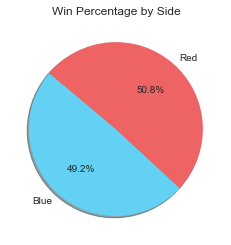

In [49]:
# Let's see if a side wins more than the other :o
labels = ['Blue', 'Red']
sizes = [games_stats['b_win'].mean(),  games_stats['r_win'].mean()]
colors = ['#63D1F4', '#EE6363']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        colors=colors, shadow=True, startangle=140)
plt.title("Win Percentage by Side")
plt.show()

In [50]:
# We cannot really tell if one of the sides favours victory
# So it must be something else that lies with player performance

## Blue vs. Red
We will look into the other games statistics to see what are the factors that are more impactful.

In [51]:
games_stats.columns

Index(['gameId', 'b_towerKills', 'b_baronKills', 'b_dragonKills',
       'b_riftHeraldKills', 'r_towerKills', 'r_baronKills', 'r_dragonKills',
       'r_riftHeraldKills', 'b_kills', 'b_deaths', 'b_assists', 'r_kills',
       'r_deaths', 'r_assists', 'b_avgLevel', 'b_totalGold',
       'b_totalVisionScore', 'b_totalDamageDealt', 'b_totalHeal',
       'b_totalDamageTaken', 'r_avgLevel', 'r_totalGold', 'r_totalVisionScore',
       'r_totalDamageDealt', 'r_totalHeal', 'r_totalDamageTaken', 'b_win',
       'r_win'],
      dtype='object')

In [58]:
categories = ['towerKills', 'baronKills', 'dragonKills',
       'riftHeraldKills', 'kills', 'deaths', 'assists', 'avgLevel', 'totalGold',
       'totalVisionScore', 'totalDamageDealt', 'totalHeal',
       'totalDamageTaken', 'win']

blue_percentage_data = {}

for category in categories:
    blue_total = games_stats['b_'+category].sum()
    red_total = games_stats['r_'+category].sum()
    total = (blue_total + red_total).sum()
    
    blue_percent = blue_total/total
    red_percent = red_total/total
    
    blue_percentage_data[category] = blue_percent

blue_over = {k:v for k,v in blue_percentage_data.items()}
red_over = {k:1-v for k,v in blue_over.items()}

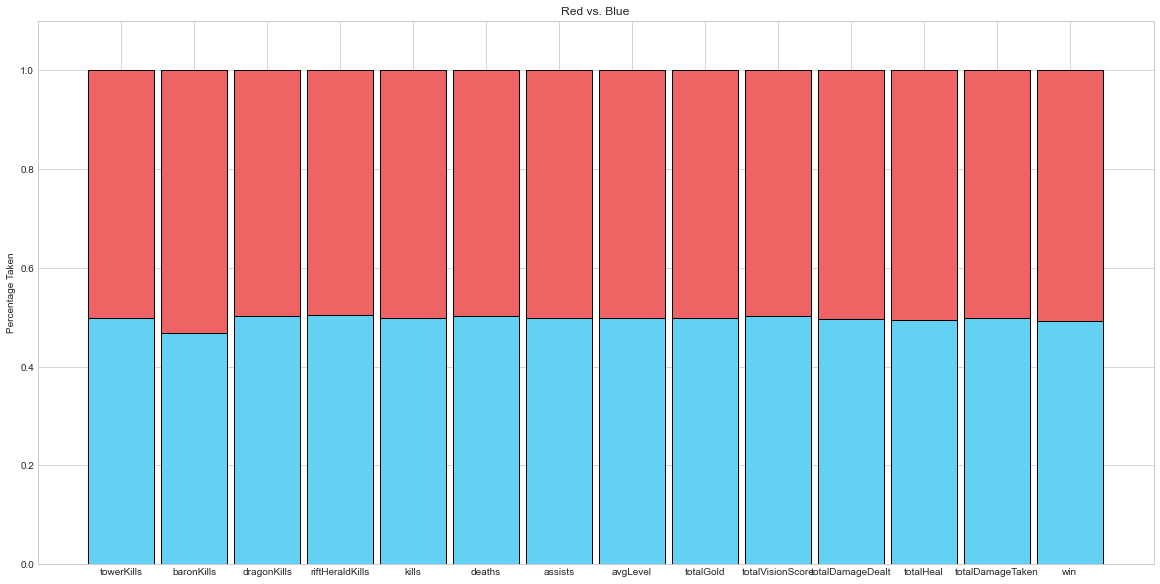

In [62]:
y = range(len(blue_over))
plt.figure(figsize=(20,10))
barWidth = 0.9
# blue
plt.bar(y, list(blue_over.values()), color='#63D1F4', edgecolor='black', width=barWidth)
# red
plt.bar(y, list(red_over.values()), bottom=list(blue_over.values()), color='#EE6363', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(y, blue_over.keys())
plt.ylim((0.00,1.10))
plt.ylabel("Percentage Taken")
plt.title("Red vs. Blue")
# Show graphic
plt.show()


## Win Correlations

In [63]:
blue_corr = games_stats.corr()['b_win'][:].sort_values(axis=0, ascending=False) 
red_corr = games_stats.corr()['r_win'][:].sort_values(axis=0, ascending=False) 

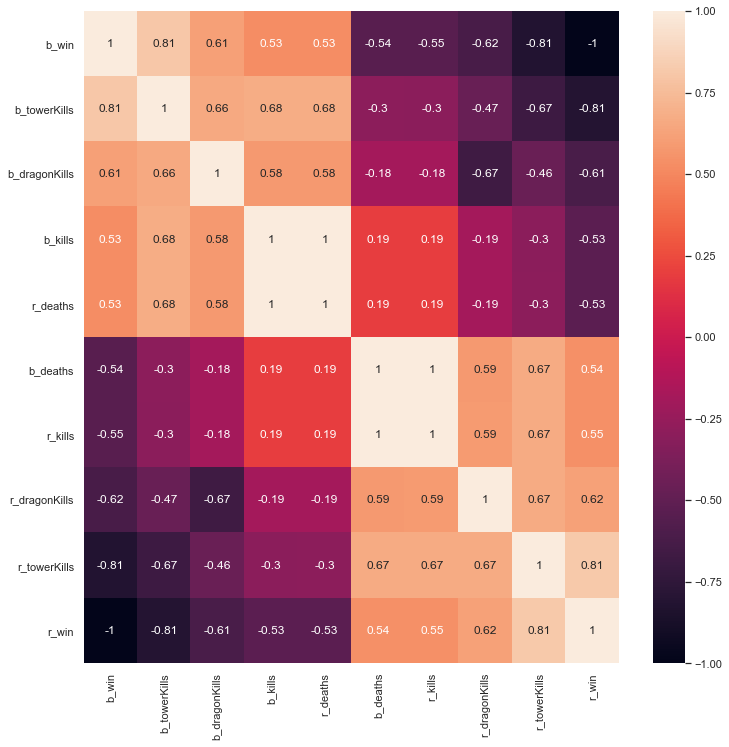

In [65]:
# get correlations of 0.5 or more
corr_cols = [prop for prop,corr in blue_corr.iteritems() if abs(corr)>0.5]
plt.figure(figsize=(12,12))
sns.set(font_scale = 1)
sns.heatmap(games_stats[corr_cols].corr(), annot=True)

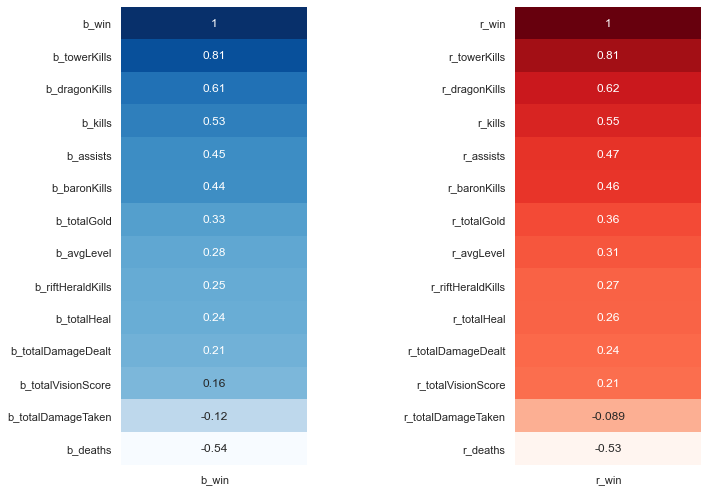

<Figure size 144x504 with 0 Axes>

<Figure size 144x504 with 0 Axes>

In [69]:
f, axes = plt.subplots(1, 2, figsize=(10, 7))

plt.figure(figsize=(2,7))
blue_corra = [prop for prop,corr in blue_corr.iteritems() if 'b_' in prop]
sns.heatmap(blue_corr[blue_corra].to_frame(), annot=True, cbar=False, ax=axes[0], cmap='Blues')

plt.figure(figsize=(2,7))
red_corra = [prop for prop,corr in blue_corr.iteritems() if 'r_' in prop]
sns.heatmap(red_corr[red_corra].sort_values(axis=0, ascending=False).to_frame(), annot=True, cbar=False, ax=axes[1], cmap='Reds')

f.tight_layout(w_pad=8)

plt.show()

## Looking through the glass of champion selection
The problematic or hypothesis we can formulate is that choosing the right champion for the right lane increases your chances of winning. To show, we will gather and aggregate the data from all champions or any lane to create a new table where we can sort values to determine a champion performance.

In [ ]:
# Let's create ten new small dataframes for our 10 players

In [89]:
# Summoner 1
champions_win_rate_b1 = games.groupby(['b_summoner1_championId', 'b_summoner1_lane']).agg({'b_win': 'sum', 'b_summoner1_championId': 'count', 'b_summoner1_kills': 'sum', 'b_summoner1_deaths': 'sum', 'b_summoner1_assists': 'sum', 'b_summoner1_goldEarned': 'sum', 'b_summoner1_totalDamageDealt': 'sum', 'b_summoner1_totalHeal': 'sum', 'b_summoner1_visionScore': 'sum'})
champions_win_rate_b1.rename_axis(index={'b_summoner1_championId': 'champion', 'b_summoner1_lane': 'lane'}, inplace=True)
champions_win_rate_b1.columns = [c.replace('b_summoner1_', '') for c in champions_win_rate_b1.columns]
champions_win_rate_b1.rename(columns={'b_win':'win'}, inplace=True)

# Summoner 2
champions_win_rate_b2 = games.groupby(['b_summoner2_championId', 'b_summoner2_lane']).agg({'b_win': 'sum', 'b_summoner2_championId': 'count', 'b_summoner2_kills': 'sum', 'b_summoner2_deaths': 'sum', 'b_summoner2_assists': 'sum', 'b_summoner2_goldEarned': 'sum', 'b_summoner2_totalDamageDealt': 'sum', 'b_summoner2_totalHeal': 'sum', 'b_summoner2_visionScore': 'sum'})
champions_win_rate_b2.rename_axis(index={'b_summoner2_championId': 'champion', 'b_summoner2_lane': 'lane'}, inplace=True)
champions_win_rate_b2.columns = [c.replace('b_summoner2_', '') for c in champions_win_rate_b2.columns]
champions_win_rate_b2.rename(columns={'b_win':'win'}, inplace=True)

# Summoner 3
champions_win_rate_b3 = games.groupby(['b_summoner3_championId', 'b_summoner3_lane']).agg({'b_win': 'sum', 'b_summoner3_championId': 'count', 'b_summoner3_kills': 'sum', 'b_summoner3_deaths': 'sum', 'b_summoner3_assists': 'sum', 'b_summoner3_goldEarned': 'sum', 'b_summoner3_totalDamageDealt': 'sum', 'b_summoner3_totalHeal': 'sum', 'b_summoner3_visionScore': 'sum'})
champions_win_rate_b3.rename_axis(index={'b_summoner3_championId': 'champion', 'b_summoner3_lane': 'lane'}, inplace=True)
champions_win_rate_b3.columns = [c.replace('b_summoner3_', '') for c in champions_win_rate_b3.columns]
champions_win_rate_b3.rename(columns={'b_win':'win'}, inplace=True)

# Summoner 4
champions_win_rate_b4 = games.groupby(['b_summoner4_championId', 'b_summoner4_lane']).agg({'b_win': 'sum', 'b_summoner4_championId': 'count', 'b_summoner4_kills': 'sum', 'b_summoner4_deaths': 'sum', 'b_summoner4_assists': 'sum', 'b_summoner4_goldEarned': 'sum', 'b_summoner4_totalDamageDealt': 'sum', 'b_summoner4_totalHeal': 'sum', 'b_summoner4_visionScore': 'sum'})
champions_win_rate_b4.rename_axis(index={'b_summoner4_championId': 'champion', 'b_summoner4_lane': 'lane'}, inplace=True)
champions_win_rate_b4.columns = [c.replace('b_summoner4_', '') for c in champions_win_rate_b4.columns]
champions_win_rate_b4.rename(columns={'b_win':'win'}, inplace=True)

# Summoner 5
champions_win_rate_b5 = games.groupby(['b_summoner5_championId', 'b_summoner5_lane']).agg({'b_win': 'sum', 'b_summoner5_championId': 'count', 'b_summoner5_kills': 'sum', 'b_summoner5_deaths': 'sum', 'b_summoner5_assists': 'sum', 'b_summoner5_goldEarned': 'sum', 'b_summoner5_totalDamageDealt': 'sum', 'b_summoner5_totalHeal': 'sum', 'b_summoner5_visionScore': 'sum'})
champions_win_rate_b5.rename_axis(index={'b_summoner5_championId': 'champion', 'b_summoner5_lane': 'lane'}, inplace=True)
champions_win_rate_b5.columns = [c.replace('b_summoner5_', '') for c in champions_win_rate_b5.columns]
champions_win_rate_b5.rename(columns={'b_win':'win'}, inplace=True)

# Summoner 6
champions_win_rate_r1 = games.groupby(['r_summoner1_championId', 'r_summoner1_lane']).agg({'r_win': 'sum', 'r_summoner1_championId': 'count', 'r_summoner1_kills': 'sum', 'r_summoner1_deaths': 'sum', 'r_summoner1_assists': 'sum', 'r_summoner1_goldEarned': 'sum', 'r_summoner1_totalDamageDealt': 'sum', 'r_summoner1_totalHeal': 'sum', 'r_summoner1_visionScore': 'sum'})
champions_win_rate_r1.rename_axis(index={'r_summoner1_championId': 'champion', 'r_summoner1_lane': 'lane'}, inplace=True)
champions_win_rate_r1.columns = [c.replace('r_summoner1_', '') for c in champions_win_rate_r1.columns]
champions_win_rate_r1.rename(columns={'r_win':'win'}, inplace=True)

# Summoner 7
champions_win_rate_r2 = games.groupby(['r_summoner2_championId', 'r_summoner2_lane']).agg({'r_win': 'sum', 'r_summoner2_championId': 'count', 'r_summoner2_kills': 'sum', 'r_summoner2_deaths': 'sum', 'r_summoner2_assists': 'sum', 'r_summoner2_goldEarned': 'sum', 'r_summoner2_totalDamageDealt': 'sum', 'r_summoner2_totalHeal': 'sum', 'r_summoner2_visionScore': 'sum'})
champions_win_rate_r2.rename_axis(index={'r_summoner2_championId': 'champion', 'r_summoner2_lane': 'lane'}, inplace=True)
champions_win_rate_r2.columns = [c.replace('r_summoner2_', '') for c in champions_win_rate_r2.columns]
champions_win_rate_r2.rename(columns={'r_win':'win'}, inplace=True)

# Summoner 8
champions_win_rate_r3 = games.groupby(['r_summoner3_championId', 'r_summoner3_lane']).agg({'r_win': 'sum', 'r_summoner3_championId': 'count', 'r_summoner3_kills': 'sum', 'r_summoner3_deaths': 'sum', 'r_summoner3_assists': 'sum', 'r_summoner3_goldEarned': 'sum', 'r_summoner3_totalDamageDealt': 'sum', 'r_summoner3_totalHeal': 'sum', 'r_summoner3_visionScore': 'sum'})
champions_win_rate_r3.rename_axis(index={'r_summoner3_championId': 'champion', 'r_summoner3_lane': 'lane'}, inplace=True)
champions_win_rate_r3.columns = [c.replace('r_summoner3_', '') for c in champions_win_rate_r3.columns]
champions_win_rate_r3.rename(columns={'r_win':'win'}, inplace=True)

# Summoner 9
champions_win_rate_r4 = games.groupby(['r_summoner4_championId', 'r_summoner4_lane']).agg({'r_win': 'sum', 'r_summoner4_championId': 'count', 'r_summoner4_kills': 'sum', 'r_summoner4_deaths': 'sum', 'r_summoner4_assists': 'sum', 'r_summoner4_goldEarned': 'sum', 'r_summoner4_totalDamageDealt': 'sum', 'r_summoner4_totalHeal': 'sum', 'r_summoner4_visionScore': 'sum'})
champions_win_rate_r4.rename_axis(index={'r_summoner4_championId': 'champion', 'r_summoner4_lane': 'lane'}, inplace=True)
champions_win_rate_r4.columns = [c.replace('r_summoner4_', '') for c in champions_win_rate_r4.columns]
champions_win_rate_r4.rename(columns={'r_win':'win'}, inplace=True)

# Summoner 10
champions_win_rate_r5 = games.groupby(['r_summoner5_championId', 'r_summoner5_lane']).agg({'r_win': 'sum', 'r_summoner5_championId': 'count', 'r_summoner5_kills': 'sum', 'r_summoner5_deaths': 'sum', 'r_summoner5_assists': 'sum', 'r_summoner5_goldEarned': 'sum', 'r_summoner5_totalDamageDealt': 'sum', 'r_summoner5_totalHeal': 'sum', 'r_summoner5_visionScore': 'sum'})
champions_win_rate_r5.rename_axis(index={'r_summoner5_championId': 'champion', 'r_summoner5_lane': 'lane'}, inplace=True)
champions_win_rate_r5.columns = [c.replace('r_summoner5_', '') for c in champions_win_rate_r5.columns]
champions_win_rate_r5.rename(columns={'r_win':'win'}, inplace=True)

In [90]:
# Now we add all the newly created dataframes into a unique dataframe to aggregate all scores
champions_win_rate = champions_win_rate_b1 + champions_win_rate_b2 + champions_win_rate_b3 + champions_win_rate_b4 + champions_win_rate_b5 
+ champions_win_rate_r1 + champions_win_rate_r2 + champions_win_rate_r3 + champions_win_rate_r4 + champions_win_rate_r5
champions_win_rate.head()

win  championId   kills  deaths  assists  goldEarned  \
champion lane                                                            
Aatrox   JUNGLE  11.0        31.0   150.0   191.0    175.0    326885.0   
         MIDDLE  15.0        33.0   180.0   194.0    236.0    346059.0   
         TOP     93.0       192.0  1026.0  1116.0   1111.0   2053821.0   
Ahri     BOTTOM  11.0        15.0    79.0   106.0    188.0    155279.0   
         JUNGLE   NaN         NaN     NaN     NaN      NaN         NaN   

                 totalDamageDealt  totalHeal  visionScore  
champion lane                                              
Aatrox   JUNGLE         3774813.0   386494.0        550.0  
         MIDDLE         3556555.0   401967.0        487.0  
         TOP           22064109.0  2322080.0       3121.0  
Ahri     BOTTOM         1256032.0    53359.0        572.0  
         JUNGLE               NaN        NaN          NaN

In [92]:
champions_win_rate.columns = ['wins', 'total games', 'kills', 'deaths', 'assists', 'gold', 'damage', 'heal', 'vision']
champions_win_rate['win rate'] = champions_win_rate['wins'] /  champions_win_rate['total games'] * 100
champions_win_rate['KDA'] = (champions_win_rate['kills'] + champions_win_rate['assists']) / champions_win_rate['deaths']
champions_win_rate = champions_win_rate.sort_values('win rate', ascending = False)
champions_win_rate = champions_win_rate[['total games', 'win rate', 'kills', 'deaths', 'assists', 'KDA', 'gold', 'damage', 'heal', 'vision']]
champions_win_rate.head()

ValueError: Length mismatch: Expected axis has 10 elements, new values have 9 elements